In [1]:
from IPython.display import HTML
HTML('''
<script>
code_show=false;
function code_toggle(){
    if(code_show){$('.prompt, .input, .output_stderr, .output_error').hide();}
    else{$('.input, .prompt, .output_stderr, .output_error').show();}
    code_show=!code_show;
}
function initialize(){
    var output=$('.output_subarea.output_text.output_stream.output_stdout');
    $.merge(output,$('.output_subarea.output_text.output_result'));
    for(var i=0;i<output.length;i++)for(var j=0;j<output[i].children.length;j++)
        output[i].children[j].style.fontFamily='Palatino';
    code_toggle();
}
$(document).ready(initialize);
</script>
Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.
''')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
from ipywidgets import interact, HTML

import plotly.graph_objects as go
import plotly

%load_ext tikzmagic

# 2 Stage error propagation
$$
    y = tan^{-1}(x) \\
    z = sin(y) \\
$$
$$
    \frac{dy}{dx} = \frac{1}{1 + x^2} \\
    \frac{dz}{dy} = \cos(y)
$$
Error propagation:
$$
    \sigma_y = \left. \frac{dy}{dx}\right|_{\mu_x} \sigma_x \\
    \sigma_z = \left. \frac{dz}{dy}\right|_{\mu_y} \sigma_y
$$

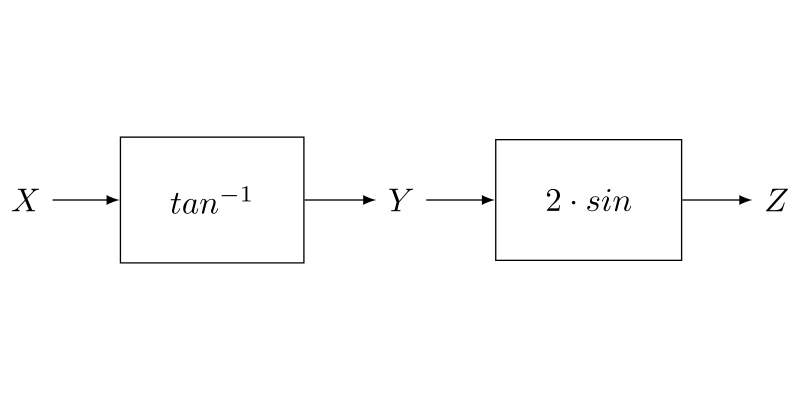

In [3]:
%%tikz -f svg -s 800,400
\node (x) at (0,-0.5) {$X$};
\node (y) at (4, -0.5) {$Y$};
\node (z) at (8, -0.5) {$Z$};

\node[draw,rectangle,anchor=west,inner sep=15] (system1) at (1,-0.5) {$tan^{-1}$};
\node[draw,rectangle,anchor=west,inner sep=15] (system2) at (5, -0.5) {$2 \cdot sin$};
\draw[-latex] (x) -- (system1.west);
\draw[latex-] (y) -- (system1.east);
\draw[-latex] (y) -- (system2.west);
\draw[latex-] (z) -- (system2.east);

In [4]:
def f1(x):
    return np.arctan(x)
def df1_dx(x):
    return 1 / (1 + x**2)
def f2(y):
    return 2 * np.sin(y)
def df2_dy(y):
    return 2 * np.cos(y)

@interact(mean=(-10.0,10.0), variance=(1e-9,6.0))
def show_linear(mean=0.0, variance=1.0):

    x = np.linspace(-10,10, 100)

    pdf1 = 1/( variance * np.sqrt(2*np.pi) ) * np.exp( -0.5 * ( (x - mean)/variance )**2 )
    
    mean_y = f1(mean)
    dx = np.linspace(mean-3*variance, mean+3*variance, 100)
    m = df1_dx(mean)
    dy = mean_y + m * (dx-mean)
    
    var_y = m * variance
    y = np.linspace(-3,3, 200)
    pdf2 = 1/( var_y * np.sqrt(2*np.pi) ) * np.exp( -0.5 * ( (y - mean_y)/var_y )**2 )
    
    width = 0.1
    height = 0.2
    left = 0.1
    bottom = 0.1
    
    spacing = 0.005

    rect_scatter = [left+width+spacing, bottom+height+spacing, 0.65, 0.65]
    rect_pdfx = [left+width+spacing, bottom, 0.65, 0.2]
    rect_pdfy = [left, bottom+height+spacing, width, 0.65]

    fig = plt.figure(figsize=(16,8))
    
    ax = fig.add_axes(rect_scatter)
    plt.title('Stage 1')
    ax_pdfx = fig.add_axes(rect_pdfx, sharex=ax)
    ax_pdfy = fig.add_axes(rect_pdfy, sharey=ax)
    
    ax.tick_params(axis='x', labelbottom=False)
    ax.tick_params(axis='y', labelleft=False)
    ax_pdfx.tick_params(axis="y", labelleft=False, labelright=True)
    ax_pdfy.tick_params(axis="x", labelbottom=False, labeltop=True)
    
    ax.plot(x, np.arctan(x), '-.')
    ax.plot(dx, dy, 'k')
    ax.set_ylim(-3, 3)
    ax.set_xlim(-10,10)
    ax.vlines(mean, -3, mean_y, colors='k', linestyle='dotted')
    ax.vlines(mean-variance, -3, mean_y-var_y, color='grey', linestyle='-.')
    ax.vlines(mean+variance, -3, mean_y+var_y, color='grey', linestyle='-.')
    ax.hlines(mean_y, -10, mean, colors='k', linestyle='dotted')
    ax.hlines(mean_y-var_y, -10, mean-variance, color='grey', linestyle='-.')
    ax.hlines(mean_y+var_y, -10, mean+variance, color='grey', linestyle='-.')
    t = ax.text(mean-0.2, mean_y+0.2, '$\\frac{df}{dx}=$' + '{0:.2}'.format(m), ha="right", va="bottom", size=15,bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=2))
    t = ax.text(9.25, 1, '$f = arctan(x)$', ha="right", va="bottom", size=15,bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=2))
    
    ax_pdfx.plot(x, pdf1)
    ax_pdfx.set_ylabel('$PDF_x$')
    ax_pdfx.set_xlim(-10,10)
    ax_pdfx.axvline(mean, color='k', linestyle='dotted')
    ax_pdfx.axvline(mean-variance, color='grey', linestyle='-.')
    ax_pdfx.axvline(mean+variance, color='grey', linestyle='-.')
    
    ax_pdfy.plot(pdf1, dy)
    ax_pdfy.set_xlabel('$PDF_y$')
    ax_pdfy.set_xlim(1e-9,13)
    ax_pdfy.set_ylim(-3, 3)
    ax_pdfy.axhline(mean_y, color='k', linestyle='dotted')
    ax_pdfy.axhline(mean_y-var_y, color='grey', linestyle='-.')
    ax_pdfy.axhline(mean_y+var_y, color='grey', linestyle='-.')
    
    plt.show()
    
    ########################
    
    y = np.linspace(-3,3, 100)

    pdf1 = 1/( var_y * np.sqrt(2*np.pi) ) * np.exp( -0.5 * ( (y - mean_y)/var_y )**2 )
    
    mean_z = f2(mean_y)
    dy = np.linspace(mean_y-3*var_y, mean_y+3*var_y, 100)
    m = df2_dy(mean_y)
    dz = mean_z + m * (dy-mean_y)
    
    var_z = m * var_y
    z = np.linspace(-2,2, 200)
    pdf2 = 1/( var_z * np.sqrt(2*np.pi) ) * np.exp( -0.5 * ( (z - mean_z)/var_z )**2 )
    
    width = 0.1
    height = 0.2
    left = 0.1
    bottom = 0.1
    
    spacing = 0.005

    rect_scatter = [left+width+spacing, bottom+height+spacing, 0.65, 0.65]
    rect_pdfy = [left+width+spacing, bottom, 0.65, 0.2]
    rect_pdfz = [left, bottom+height+spacing, width, 0.65]

    fig = plt.figure(figsize=(16,8))
    
    ax = fig.add_axes(rect_scatter)
    plt.title('Stage 2')
    ax_pdfy = fig.add_axes(rect_pdfy, sharex=ax)
    ax_pdfz = fig.add_axes(rect_pdfz, sharey=ax)
    
    ax.tick_params(axis='x', labelbottom=False)
    ax.tick_params(axis='y', labelleft=False)
    ax_pdfy.tick_params(axis="y", labelleft=False, labelright=True)
    ax_pdfz.tick_params(axis="x", labelbottom=False, labeltop=True)
    
    ax.plot(y, f2(y), '-.')
    ax.plot(dy, dz, 'k')
    ax.set_ylim(-3, 3)
    ax.set_xlim(-3,3)
    ax.vlines(mean_y, -3, mean_z, colors='k', linestyle='dotted')
    ax.vlines(mean_y-var_y, -3, mean_z-var_z, color='grey', linestyle='-.')
    ax.vlines(mean_y+var_y, -3, mean_z+var_z, color='grey', linestyle='-.')
    ax.hlines(mean_z, -3, mean_y, colors='k', linestyle='dotted')
    ax.hlines(mean_z-var_z, -3, mean_y-var_y, color='grey', linestyle='-.')
    ax.hlines(mean_z+var_z, -3, mean_y+var_y, color='grey', linestyle='-.')
    t = ax.text(mean_y-0.2, mean_z+0.2, '$\\frac{dz}{dy}=$' + '{0:.2}'.format(m), ha="right", va="bottom", size=15,bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=2))
    t = ax.text(1.25, 1, '$f = 2 sin(y)$', ha="right", va="bottom", size=15,bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=2))
    
    ax_pdfy.plot(y, pdf1)
    ax_pdfy.set_ylabel('$PDF_y$')
    ax_pdfy.set_xlim(-3,3)
    ax_pdfy.axvline(mean_y, color='k', linestyle='dotted')
    ax_pdfy.axvline(mean_y-var_y, color='grey', linestyle='-.')
    ax_pdfy.axvline(mean_y+var_y, color='grey', linestyle='-.')
    
    ax_pdfz.plot(pdf1, dz)
    ax_pdfz.set_xlabel('$PDF_z$')
    ax_pdfz.set_xlim(1e-9,13)
    ax_pdfz.set_ylim(-3, 3)
    ax_pdfz.axhline(mean_z, color='k', linestyle='dotted')
    ax_pdfz.axhline(mean_z-var_z, color='grey', linestyle='-.')
    ax_pdfz.axhline(mean_z+var_z, color='grey', linestyle='-.')
    
    plt.show()
    
    print('std:', var_z)

interactive(children=(FloatSlider(value=0.0, description='mean', max=10.0, min=-10.0), FloatSlider(value=1.0, …

# Influence of one stage to the outcome

If we want to identify the influence of a stage to the resulting uncertrainty, a sum would be handy.
<img style="height:100px;width:auto;" src="https://upload.wikimedia.org/wikipedia/commons/f/f3/Number_line_with_addition_of_1_and_2.svg" />
Unfortunately, the influence of each stage results in the product of them.
$$
    \sigma_{out}^2 = \left(m_2 m_1 \sigma_{in}\right)^2 \\
    \sigma_{out} = m_2 m_1 \sigma_{in}
$$

We can overcome this using the *logarithmic laws* as followed:
* $\log(m_1 \cdot m_2) = \log(m_1) + \log(m_2)$
* $\log( \frac{m_1}{m_2} ) = \log(m_1) - \log(m_2)$

Furthermore, by slightly changing the first equation, we can identify the influence of each stage in percent:
\begin{align}
    \log(m_1 \cdot m_2) &= \log(m_1) + \log(m_2) \\
    1 &= \cfrac{ \log(m_1) }{ \log(m_1 \cdot m_2) } + \cfrac{ \log(m_2) }{ \log(m_1 \cdot m_2) }
\end{align}

This formula also holds for more than a two stages:
\begin{align}
    \log(m_1 \cdot m_{23}) &= \log(m_1) + \log(m_{23}) \\
    \log(m_1 \cdot (m_2 \cdot m_3)) &= \log(m_1) + \log\left(m_2 \cdot m_3\right) \\
    \log(m_1 \cdot m_2 \cdot m_3) &= \log(m_1) + \log(m_2) + \log(m_3) \\
    1 &= \cfrac{ \log(m_1) }{ \log(m_1 \cdot m_2 \cdot m_3) } + \cfrac{ \log(m_2) }{ \log(m_1 \cdot m_2 \cdot m_3) } + \cfrac{ \log(m_3) }{ \log(m_1 \cdot m_2 \cdot m_3) }
\end{align}

So the influence $I_i$ of one stage $i$ out of all stages $n$ can be defined as followed:
$$
    I_i = \cfrac{ \log(m_i) }{ \log\left(\prod\limits_k^n m_k\right) }
$$

## Validation
<img style="width: 50%; height:auto;" src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Binary_logarithm_plot_with_grid.png" />
If we now only consider values $\Vert m_i \Vert \geq 1$, their logarithm is only positive. Thus, the equation for the intensity $I_i$ holds. The same holds for values $0 < m_i < 1$, because their logarithm results in negative values. If one value $\Vert m_k \Vert \in \{\forall i. m_i\}$ is smaller than 1 and all others are greater than 1, the equation for the intensity $I_i$ does not hold. To overcome this issue, we need to handle this condition using the second <i>logarithmic law</i> $\log( \frac{1}{\Vert m_2 \Vert} ) = - \log(\Vert m_2 \Vert)$.

\begin{align}
    I_i &= \left\{ \begin{array}{cc}
        \cfrac{ -\log( \Vert m_i \Vert ) }{ \log\left(\prod\limits_{k \neq i} \Vert m_k \Vert \right) - log( \Vert m_i \Vert ) } & \text{for } \Vert m_i \Vert < 0 \wedge \Vert m_k \Vert \geq 1 | \forall k, \\
        \cfrac{ \log(\Vert m_i \Vert) }{ \log\left(\prod\limits_{k \neq j} \Vert m_k \Vert \right) - log( \Vert m_j \Vert ) } & \text{for } \Vert m_j \Vert < 0 \wedge \Vert m_k \Vert \geq 1 | \forall k, \\
        \cfrac{ \log( \Vert m_i \Vert ) }{ \log\left( \prod\limits_k \Vert m_k \Vert \right) } & \text{otherwise}
    \end{array} \right.
\end{align}

## Examples to gain more intuition

### Equal influence of the reciprocal value
\begin{align}
    m_1 &= 2 & m_2 &= \frac{1}{2}
\end{align}
\begin{align}
    m &= m_1 \cdot m_2 = 1 \\
    I_1 &= \frac{ \log(2) }{ \log(2) - log(\frac{1}{2}) } = \frac{ \log(2) }{ \log(2) - (- log(2)) } = 50 \% \\
    I_2 &= \frac{ - log(\frac{1}{2}) }{ \log(2) - log(\frac{1}{2}) } = \frac{ - (-\log(2)) }{ \log(2) - (- log(2)) } = 50 \%
\end{align}

### Influence of the identy
\begin{align}
    m_1 &= 1 & m_2 &= 10
\end{align}
\begin{align}
    m &= m_1 \cdot m_2 = 10 \\
    I_1 &= \frac{ \log(1) }{ \log(1) + log(10) } = \frac{ 0 }{ 0 + log(10) } = 0 \% \\
    I_2 &= \frac{ \log(10) }{ \log(1) + log(10) } = \frac{ \log(10) }{ log(10) } = 100 \%
\end{align}

### Doubled influence 
\begin{align}
    m_1 &= 2 & m_2 &= 4
\end{align}
\begin{align}
    m &= m_1 \cdot m_2 = 8 \\
    I_1 &= \frac{ \log(2) }{ \log(2) + log(4) } = \frac{ \log(2) }{ \log(2) + \log(2 \cdot 2) } =  \frac{ \log(2) }{ 3 \cdot \log(2) } = 33 \% \\
    I_2 &= \frac{ \log(4) }{ \log(2) + log(4) } = \frac{ 2 \cdot \log(2) }{ 3 \cdot \log(2) } = 66 \%
\end{align}

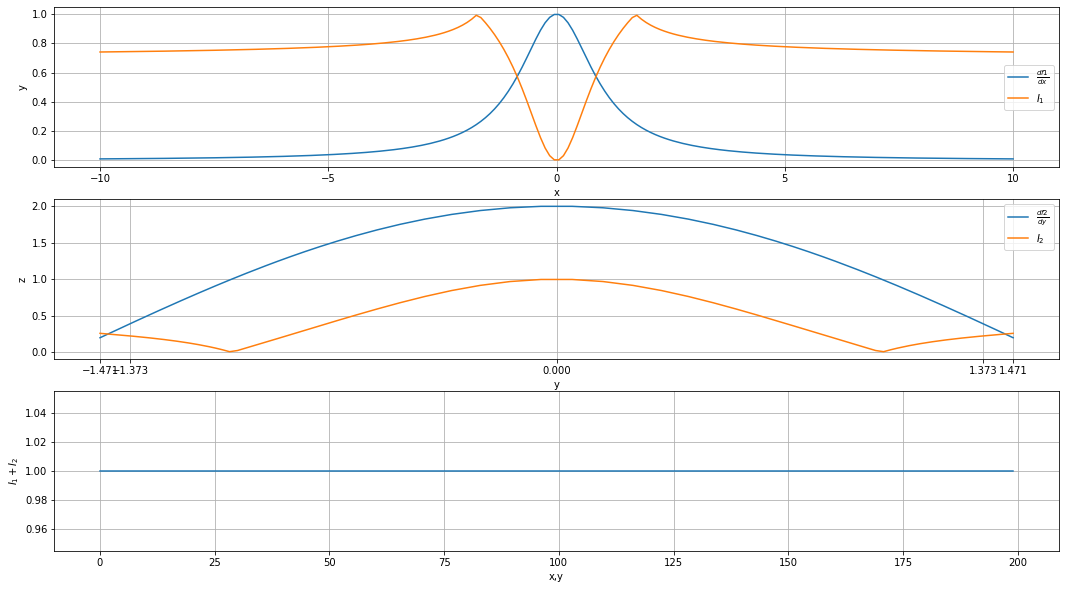

In [5]:
mean_x = np.linspace(-10, 10, 200)
m1 = df1_dx(mean_x)

mean_y = f1(mean_x)
m2 = df2_dy(mean_y)

selector1 = (m1 >= 1.0) & (m2 < 1.0)
selector2 = (m2 >= 1.0) & (m1 < 1.0)

I_1 = np.log(m1) / np.log(m1 * m2)
I_2 = np.log(m2) / np.log(m1 * m2)

I_1[ selector1 ] = np.log(m1[selector1]) / ( np.log(m1[selector1]) - np.log(m2[selector1]) )
I_1[ selector2 ] = -np.log(m1[selector2]) / ( np.log(m2[selector2]) - np.log(m1[selector2])) 

I_2[ selector1 ] = -np.log(m2[selector1]) / ( np.log(m1[selector1]) - np.log(m2[selector1]) )
I_2[ selector2 ] = np.log(m2[selector2]) / ( np.log(m2[selector2]) - np.log(m1[selector2]) )

ticks_x = np.linspace(-10, 10, 5)
ticks_y = f1(ticks_x)

plt.figure(figsize=(18,10))
plt.subplot(3,1,1)
plt.plot(mean_x, m1, label=r'$\frac{df1}{dx}$')
plt.plot(mean_x, I_1, label='$I_1$')
plt.xticks(ticks_x)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(mean_y, m2, label=r'$\frac{df2}{dy}$')
plt.plot(mean_y, I_2, label='$I_2$')
plt.xticks(ticks_y)
plt.xlabel('y')
plt.ylabel('z')
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(I_1 + I_2)
plt.xlabel('x,y')
plt.ylabel(r'$I_1 + I_2$')
plt.grid()

plt.show()